link of dataset = 'https://www.kaggle.com/datasets/zalando-research/fashionmnist/code'

In [1]:
import tensorflow as tf

# Check if GPU is available
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs are available:", gpus)
else:
    print("No GPU available.")

# Check if TensorFlow is using the GPU
print("Is TensorFlow using GPU:", tf.test.is_gpu_available())


GPUs are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is TensorFlow using GPU: True


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
from tensorflow.keras.utils import to_categorical

In [3]:
# load datasets
train_dataset = pd.read_csv('Datasets/Fashion MNIST/fashion-mnist_train.csv')
test_dataset = pd.read_csv('Datasets/Fashion MNIST/fashion-mnist_test.csv')

In [4]:
print(f'shape of training data : {train_dataset.shape}')
train_dataset.head(5)

shape of training data : (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(f'shape of testing data : {test_dataset.shape}')
test_dataset.head(5)

shape of testing data : (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# spliting the datasets
x_train = train_dataset.iloc[:,1:].values.reshape(-1, 28, 28, 1)
y_train = train_dataset.iloc[:,0].values.reshape(-1, 1)
x_test = test_dataset.iloc[:,1:].values.reshape(-1, 28, 28, 1)
y_test = test_dataset.iloc[:,0].values.reshape(-1, 1)

print("shape of data : ")
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

shape of data : 
x_train : (60000, 28, 28, 1)
y_train : (60000, 1)
x_test : (10000, 28, 28, 1)
y_test : (10000, 1)


In [7]:
# Normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# creating the model
model = Sequential()

# model architecture
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), batch_size=64)

Epoch 1/100
938/938 [==============================] - 19s 10ms/step - loss: 1.0260 - accuracy: 0.6113 - val_loss: 0.6209 - val_accuracy: 0.7568
Epoch 2/100
938/938 [==============================] - 8s 9ms/step - loss: 0.6972 - accuracy: 0.7445 - val_loss: 0.5364 - val_accuracy: 0.8056
Epoch 3/100
938/938 [==============================] - 8s 9ms/step - loss: 0.6336 - accuracy: 0.7694 - val_loss: 0.4818 - val_accuracy: 0.8241
Epoch 4/100
938/938 [==============================] - 8s 9ms/step - loss: 0.5855 - accuracy: 0.7877 - val_loss: 0.4480 - val_accuracy: 0.8357
Epoch 5/100
938/938 [==============================] - 8s 9ms/step - loss: 0.5629 - accuracy: 0.7980 - val_loss: 0.4204 - val_accuracy: 0.8382
Epoch 6/100
938/938 [==============================] - 8s 8ms/step - loss: 0.5417 - accuracy: 0.8052 - val_loss: 0.4023 - val_accuracy: 0.8528
Epoch 7/100
938/938 [==============================] - 8s 8ms/step - loss: 0.5259 - accuracy: 0.8111 - val_loss: 0.3941 - val_accuracy: 0.85

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'model loss : {loss*100:.2f}%')
print(f'model accuracy : {accuracy*100:.2f}%')

313/313 [==============================] - 2s 6ms/step - loss: 0.3106 - accuracy: 0.8843
model loss : 31.06%
model accuracy : 88.43%


Enter index:  20


1/1 [==============================] - 0s 29ms/step


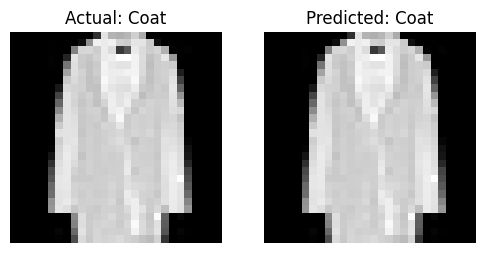

In [19]:
# Define the labels for Fashion MNIST
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Prompt user to select an index
index = int(input('Enter index: '))

# Prepare the image data
image = test_dataset.iloc[index, 1:].values.reshape(28, 28, 1)

# Get the actual label from the test dataset
actual_label = labels[int(test_dataset.iloc[index, 0])]

# Make a prediction for the selected image
prediction = model.predict(image.reshape(-1, 28, 28, 1))
predicted_label = labels[np.argmax(prediction)]

# Plot the actual and predicted images side by side
plt.figure(figsize=(6, 3))

# Plot actual image
plt.subplot(1, 2, 1)
plt.title(f'Actual: {actual_label}')
plt.imshow(image.squeeze(), cmap='gray')  # Use squeeze to remove the singleton dimension
plt.axis('off')

# Plot predicted image
plt.subplot(1, 2, 2)
plt.title(f'Predicted: {predicted_label}')
plt.imshow(image.squeeze(), cmap='gray')  # Use squeeze to remove the singleton dimension
plt.axis('off')

plt.show()

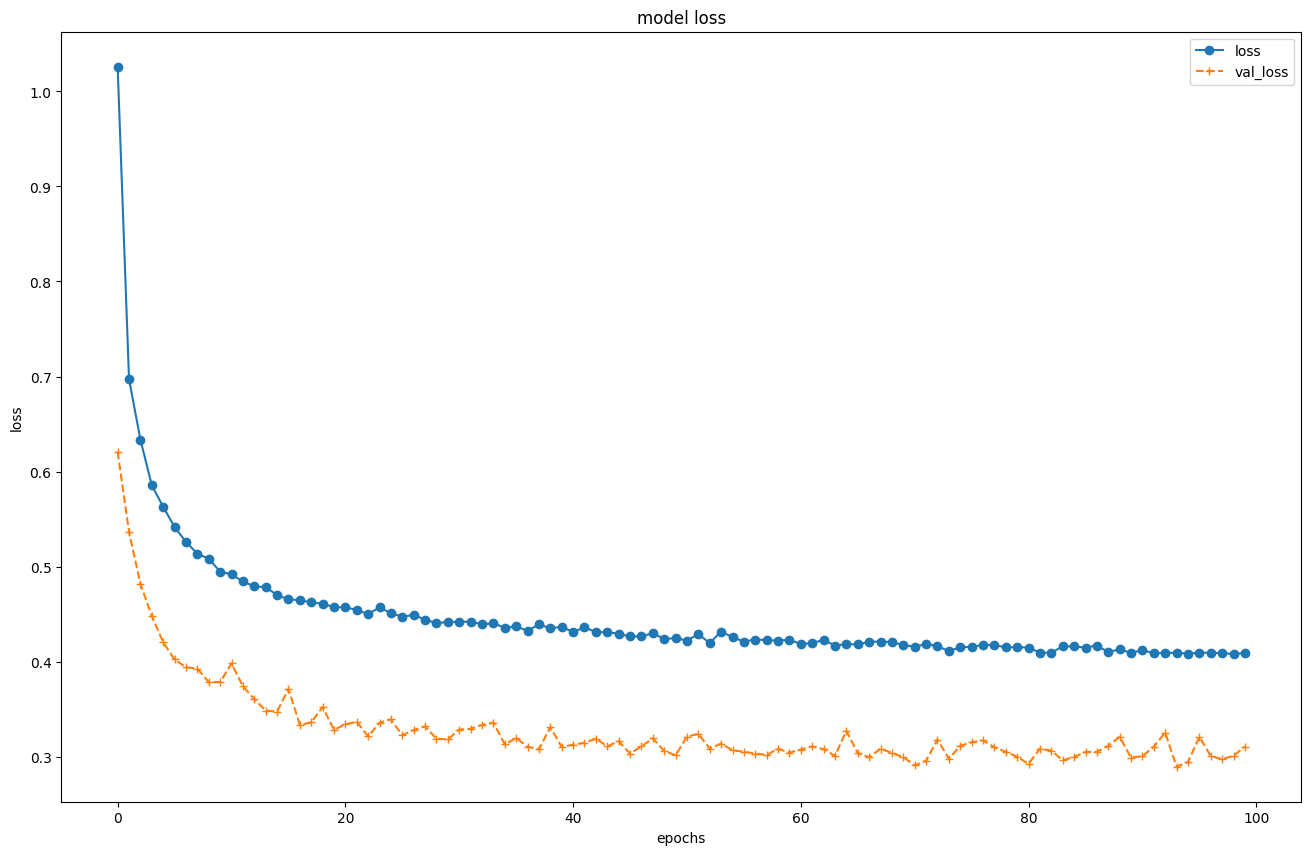

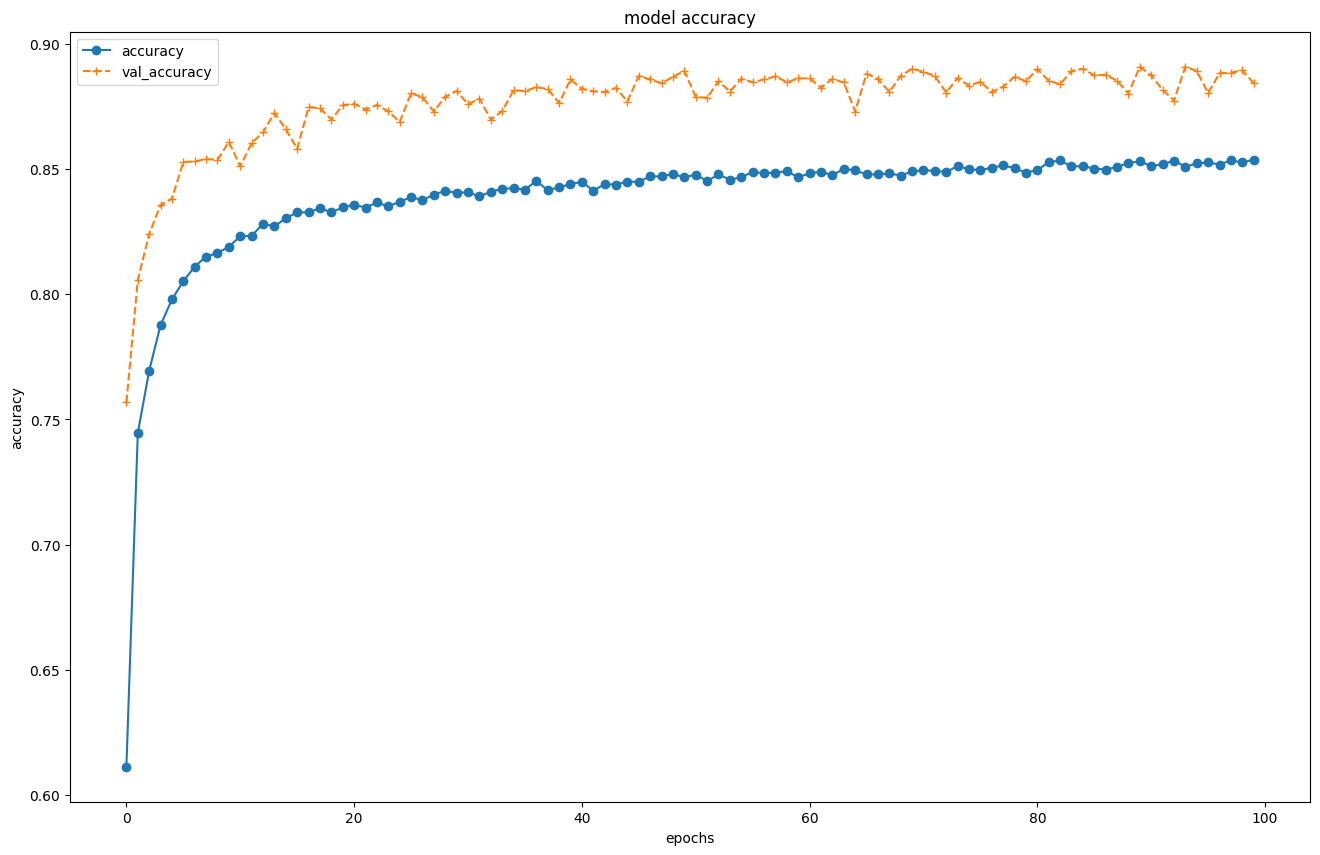

In [40]:
plt.figure(figsize=(16,10))
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], linestyle='-', marker='o', label='loss')
plt.plot(history.history['val_loss'], linestyle='--', marker='+', label='val_loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,10))
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], linestyle='-', marker='o', label='accuracy')
plt.plot(history.history['val_accuracy'], linestyle='--', marker='+', label='val_accuracy')
plt.legend()
plt.show()